<a href="https://colab.research.google.com/github/Kenzi-GIT/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Berikut adalah tugas Pengolahan Citra Digital mengenai cara melakukan manipulasi resolusi citra yaitu:

*   Down Sampling (Max, Average, Medium)
*   Up Sampling (NN, Bilinear, Bicubic)



Melakukan import pada library dan file yang diperlukan untuk tugas berikut

In [4]:
!rm -rf PCD_Assignment01
!git clone https://github.com/Kenzi-GIT/PCD_Assignment01

Cloning into 'PCD_Assignment01'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 3.20 MiB | 8.24 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

file1 = "/content/PCD_Assignment01/Downsample_IMG.jpg"
file2 = "/content/PCD_Assignment01/upsampling.jpg"

down_img = cv2.imread(file1)
down_img = cv2.cvtColor(down_img, cv2.COLOR_BGR2RGB)

up_img = cv2.imread(file2)
up_img = cv2.cvtColor(up_img, cv2.COLOR_BGR2RGB)

if any(img is None for img in [down_img, up_img]):
    print("Gambar tidak ditemukan, cek path!")
else:
    print("Gambar berhasil dibaca")

Gambar berhasil dibaca


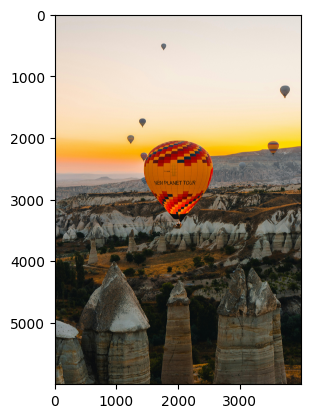

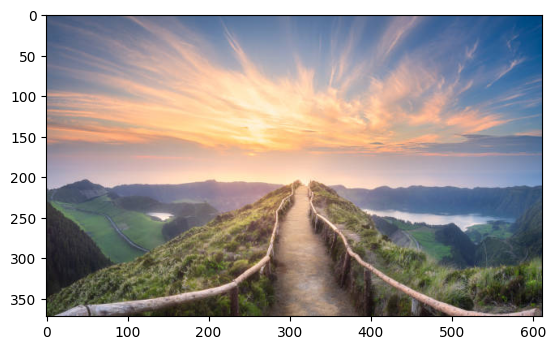

In [6]:
plt.imshow(down_img, cmap="gray")
plt.show()

plt.imshow(up_img, cmap="gray")
plt.show()

# Down Sampling

Down Sampling adalah suatu proses yang bertujuan untuk mengurangi kualitas atau jumlah piksel pada suatu citra foto. Tujuannya agar mempermudah/mempercepat efisiensi dalam komputasi, Menyaring informasi yang sekiranya penting, dan digunakan untuk pooling layer pada CNN

# Down Sampling using Maximum Method


**Max Pooling**
Metode dengan cara mengambil nilai maksimum dari sebuah blok/windows pada gambar (misal 2×2).
Tujuan dari metode ini adalah mencari fitur paling menonjol (misalnya tepi, tekstur)

Langkah-langkah:
1. Bagi citra ke dalam blok-blok kecil (misalnya 2×2 piksel).
2. Ambil nilai piksel terbesar dari setiap blok.
3. Susun hasilnya ke dalam citra baru yang ukurannya lebih kecil.

Contoh:
Blok [2 5 : 7 3]
hasil = 7

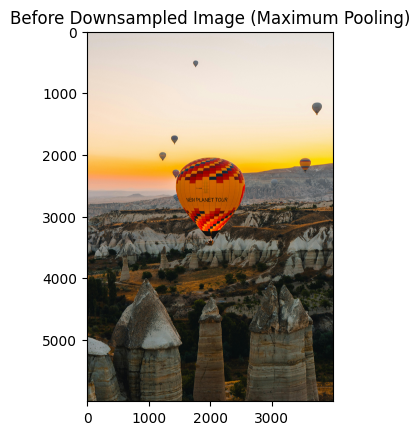

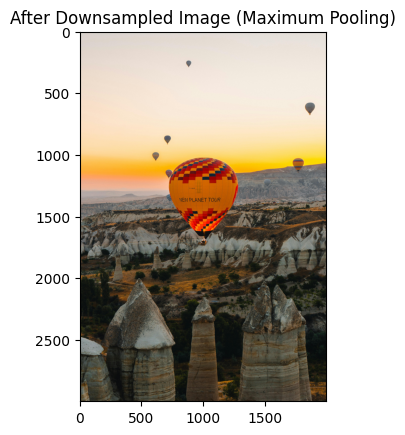

In [7]:
def downsample_max(img, factor):
  height, width, channels = img.shape  # Extract the height, width, and channels of the image

  nheight = height // factor
  nwidth = width // factor

  if (nheight == 0 or nwidth == 0):
    print("Factor is too high, Can't Down Sample")
    return

  res = np.zeros((nheight, nwidth, channels), dtype=np.uint8)  # Create an empty image with the reduced size

  for i in range(nheight):  # Process every pixel of the new image
    for j in range(nwidth):
      for c in range(channels):
        res[i, j, c] = np.max(img[i*factor:(i+1)*factor, j*factor:(j+1)*factor, c])

  return res

factor = 2
hasil = downsample_max(down_img, factor)

plt.title("Before Downsampled Image (Maximum Pooling)")
plt.imshow(down_img)
plt.show()

plt.title("After Downsampled Image (Maximum Pooling)")
plt.imshow(hasil)
plt.show()

# Down Sampling using AVERAGE Method

---



Metode dengan menghitung rata-rata nilai piksel dalam blok baru
menggunakan hasil dari rata-rata tersebut.
Kegunaan: Lebih mempertahankan informasi umum, tapi detail tajam hilang.
Langkah-langkah:
1. Bagi citra ke blok-blok kecil.
2. Hitung rata-rata dari piksel di setiap blok.
3. Simpan hasil rata-rata ke citra baru.
Contoh:
Blok [5 4 : 8 3] → (5+4+8+3)/4 = 5.

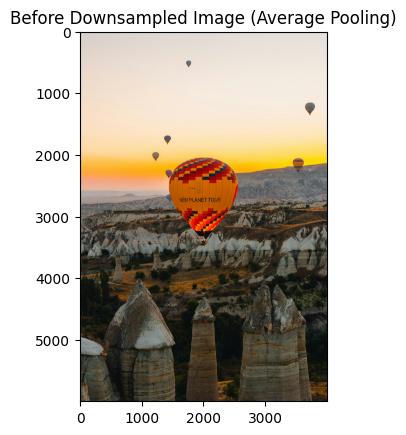

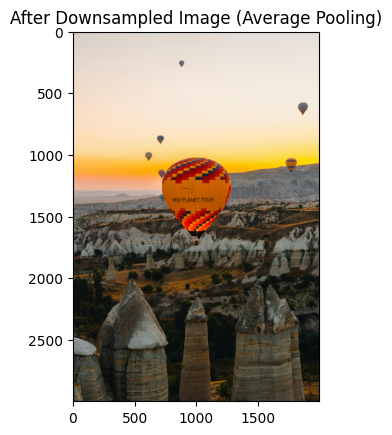

In [8]:
def downsample_avg(img, factor):
  height, width, channels = img.shape  # Extract the height, width, and channels of the image

  nheight = height // factor
  nwidth = width // factor

  if (nheight == 0 or nwidth == 0):
    print("Factor is too high, Can't Down Sample")
    return

  res = np.zeros((nheight, nwidth, channels), dtype=np.uint8)  # Create an empty image with the reduced size

  for i in range(nheight):  # Process every pixel of the new image
    for j in range(nwidth):
      for c in range(channels):
        res[i, j, c] = np.mean(img[i*factor:(i+1)*factor, j*factor:(j+1)*factor, c])

  return res

factor = 2
hasil = downsample_avg(down_img, factor)

plt.title("Before Downsampled Image (Average Pooling)")
plt.imshow(down_img)
plt.show()

plt.title("After Downsampled Image (Average Pooling)")
plt.imshow(hasil)
plt.show()

# Down Sampling using Medium Method



Metode ini sangat simple yaitu hanya dengan mengambil nilai tengah (median) dari piksel dalam blok.
Metode ini bagus untuk mengurangi noise tanpa terlalu membuat gambar tampak blur.

Langkah-langkah:
1. Bagi citra ke blok-blok kecil.
2. Urutkan nilai piksel di blok.
3. Ambil nilai median.
Contoh:
Blok [9 5 : 2 6] (diurutkan → [2, 5, 6, 9]) → median = 6.



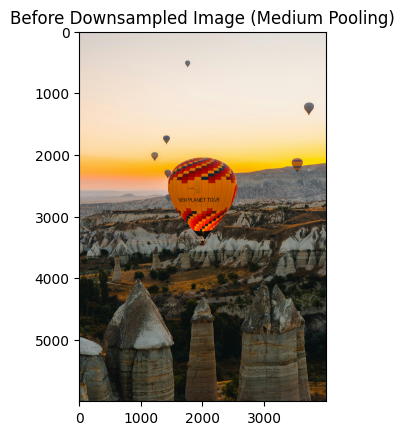

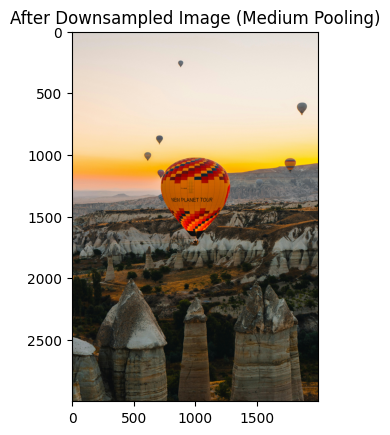

In [9]:
def downsample_medium(img, factor):
  height, width, channels = img.shape  # Extract the height, width, and channels of the image

  nheight = height // factor
  nwidth = width // factor

  if (nheight == 0 or nwidth == 0):
    print("Factor is too high, Can't Down Sample")
    return

  res = np.zeros((nheight, nwidth, channels), dtype=np.uint8)  # Create an empty image with the reduced size

  for i in range(nheight):  # Process every pixel of the new image
    for j in range(nwidth):
      for c in range(channels):
        res[i, j, c] = np.median(img[i*factor:(i+1)*factor, j*factor:(j+1)*factor, c])

  return res

factor = 2
hasil = downsample_medium(down_img, factor)

plt.title("Before Downsampled Image (Medium Pooling)")
plt.imshow(down_img)
plt.show()

plt.title("After Downsampled Image (Medium Pooling)")
plt.imshow(hasil)
plt.show()

# Perbedaan hasil dari 3 Metode Downsampling (Max, Average, Medium)

**Penjelasan**
Dari ketiga metode tersebut didapatkanlah hasil sebagai berikut dengan menggunakan nilai faktor 2. Maka hasil gambar adalah sebagai berikut untuk Down Sampling

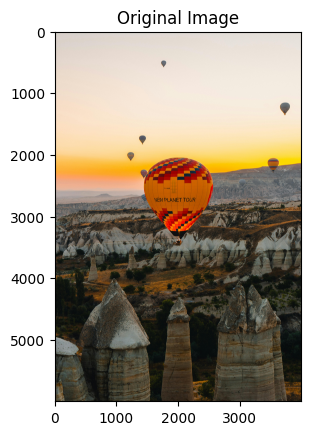

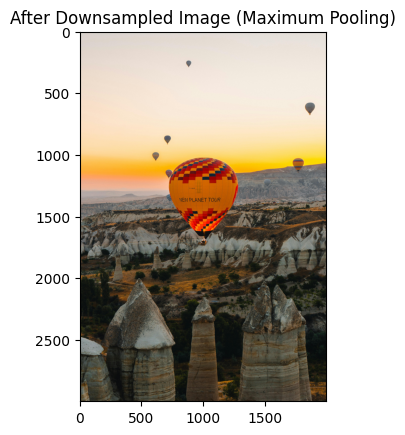

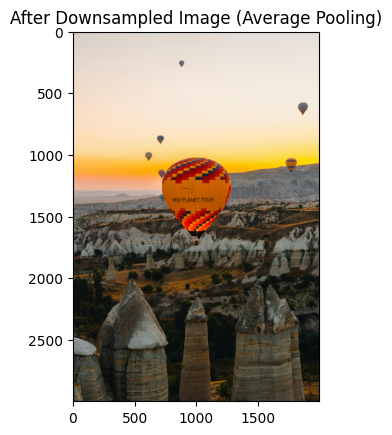

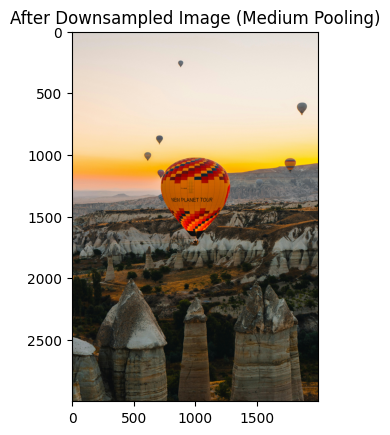

In [10]:
plt.title("Original Image")
plt.imshow(down_img)
plt.show()

hasil1 = downsample_max(down_img, factor)
plt.title("After Downsampled Image (Maximum Pooling)")
plt.imshow(hasil1)
plt.show()

hasil2 = downsample_avg(down_img, factor)
plt.title("After Downsampled Image (Average Pooling)")
plt.imshow(hasil2)
plt.show()

hasil3 = downsample_medium(down_img, factor)
plt.title("After Downsampled Image (Medium Pooling)")
plt.imshow(hasil3)
plt.show()

#Up Sampling using Nearest Neighbour


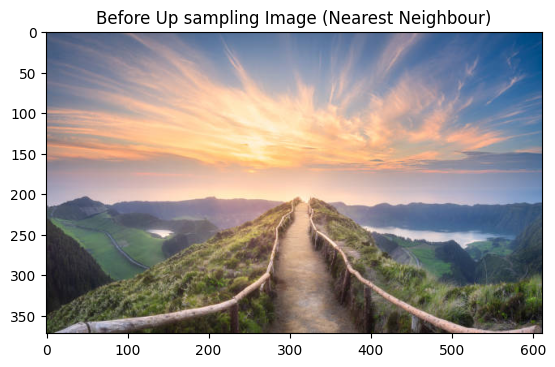

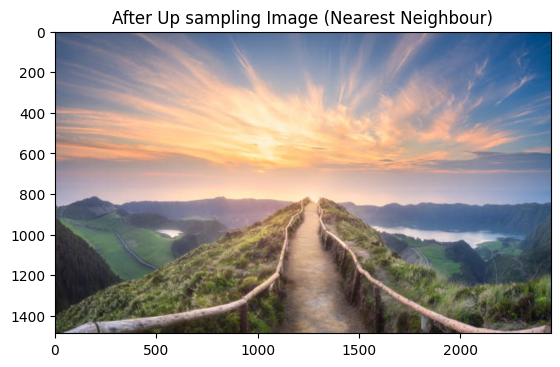

In [11]:
def upsampling_nn(img, factor):
  height, width, channels = img.shape  # Extract the height, width, and channels of the image

  nheight = height * factor
  nwidth = width * factor

  res = np.zeros((nheight, nwidth, channels), dtype=np.uint8)  # Create an empty image with the reduced size

  for i in range(nheight):
    for j in range(nwidth):
      ni = i // factor
      nj = j // factor
      res[i, j] = img[ni, nj]

  return res

factor = 4
hasil = upsampling_nn(up_img, factor)

plt.title("Before Up sampling Image (Nearest Neighbour)")
plt.imshow(up_img)
plt.show()

plt.title("After Up sampling Image (Nearest Neighbour)")
plt.imshow(hasil)
plt.show()

#Up Sampling using Bilinear Method

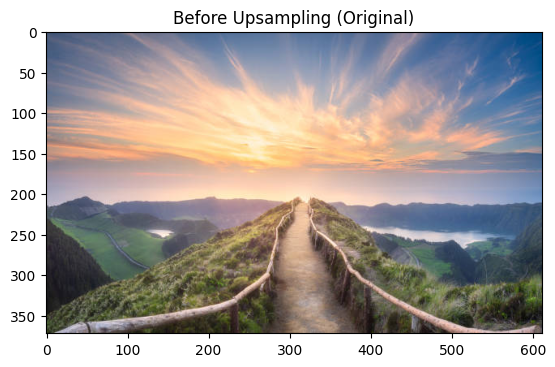

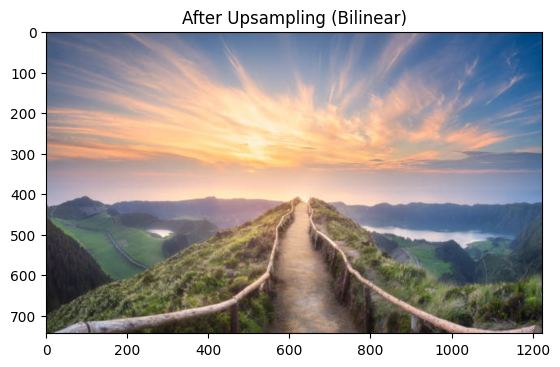

In [12]:
def upsampling_bilinear(img):
    factor = 2
    height, width, channels = img.shape
    nheight, nwidth = height * factor, width * factor

    res = np.zeros((nheight, nwidth, channels), dtype=np.uint8)

    for i in range(nheight):
        for j in range(nwidth):
            # Map ke koordinat lama
            src_x = i / factor
            src_y = j / factor

            x0 = int(np.floor(src_x))
            y0 = int(np.floor(src_y))
            x1 = min(x0 + 1, height - 1)
            y1 = min(y0 + 1, width - 1)

            dx = src_x - x0
            dy = src_y - y0

            # Bilinear interpolation formula
            top = (1 - dx) * img[x0, y0] + dx * img[x1, y0]
            bottom = (1 - dx) * img[x0, y1] + dx * img[x1, y1]
            value = (1 - dy) * top + dy * bottom

            res[i, j] = np.clip(value, 0, 255)

    return res

hasil = upsampling_bilinear(up_img)

plt.title("Before Upsampling (Original)")
plt.imshow(up_img)
plt.show()

plt.title("After Upsampling (Bilinear)")
plt.imshow(hasil)
plt.show()

# Up Sampling using Bicubic Method

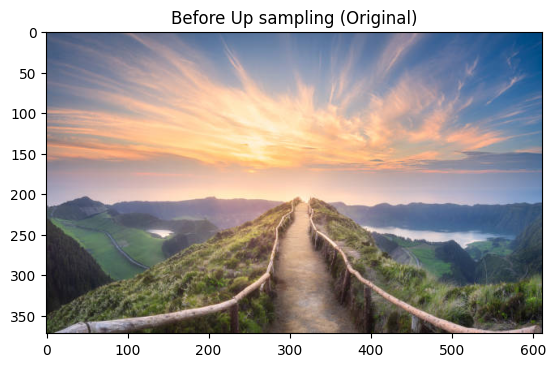

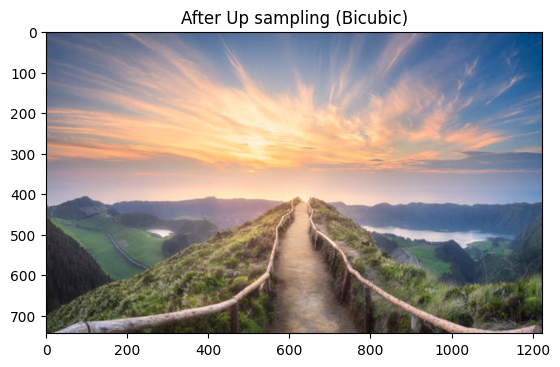

In [13]:
def cubic_weight(t, a=-0.5):
    """Cubic kernel function (Catmull-Rom when a=-0.5)"""
    t = abs(t)
    if t <= 1:
        return (a + 2) * (t**3) - (a + 3) * (t**2) + 1
    elif t < 2:
        return a * (t**3) - 5*a * (t**2) + 8*a*t - 4*a
    return 0

def upsampling_bicubic(img, factor):
    height, width, channels = img.shape
    nheight, nwidth = height * factor, width * factor
    res = np.zeros((nheight, nwidth, channels), dtype=np.uint8)

    for i in range(nheight):
        for j in range(nwidth):
            # Map pixel in new image to old image space
            x = i / factor
            y = j / factor
            x0 = int(np.floor(x))
            y0 = int(np.floor(y))

            value = np.zeros(channels, dtype=np.float64)

            # 4x4 neighborhood
            for m in range(-1, 3):
                for n in range(-1, 3):
                    xm = min(max(x0 + m, 0), height - 1)
                    yn = min(max(y0 + n, 0), width - 1)

                    wx = cubic_weight(x - (x0 + m))
                    wy = cubic_weight(y - (y0 + n))
                    weight = wx * wy

                    value += img[xm, yn] * weight

            # Clip and assign
            res[i, j] = np.clip(value, 0, 255).astype(np.uint8)

    return res


# Example usage
factor = 2
hasil = upsampling_bicubic(up_img, factor)

plt.title("Before Up sampling (Original)")
plt.imshow(up_img)
plt.show()

plt.title("After Up sampling (Bicubic)")
plt.imshow(hasil)
plt.show()
